### Importing Required Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')

In [3]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes:
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
df.shape

(41188, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Getting only Categorical Columns

df.describe(include = 'O')   #capital 'O'

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
# Checking for null values

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- Null Values are not present

In [9]:
#Checking DUplicate Values

df.duplicated().sum()

1784

In [10]:
df.drop_duplicates(inplace = True)

- Removed duplicate values

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
#Renaming Columns

df.rename(columns = {
    'emp.var.rate': 'emp_var_rate',
    'cons.price.idx': 'cons_price_idx',
    'cons.conf.idx': 'cons_conf_idx',
    'nr.employed': 'nr_employed'
}, inplace = True)

### Exploratory Data Analysis

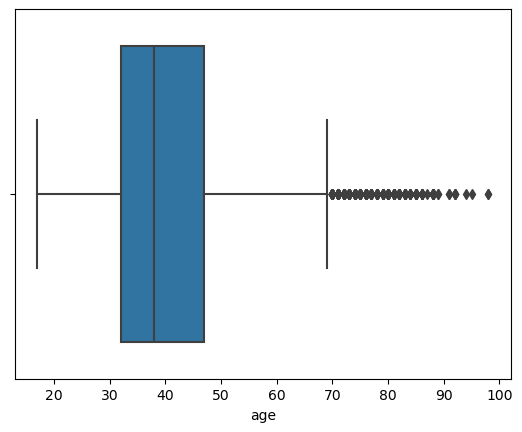

In [13]:
sns.boxplot(x = 'age', data = df)
plt.show()

In [14]:
#Removing Outliers

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
LR = Q1 - IQR*1.5 
UR = Q3 + IQR*1.5
print(Q1,Q3, IQR, LR, UR)

32.0 47.0 15.0 9.5 69.5


In [15]:
df[(df['age']>=LR) & (df['age']<=UR)] # not storing the values in any variable and for store define any variable before this code.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


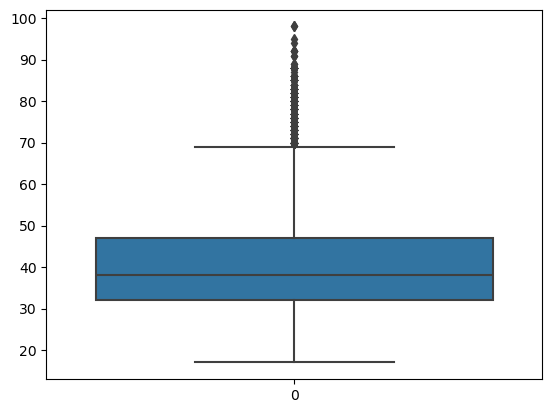

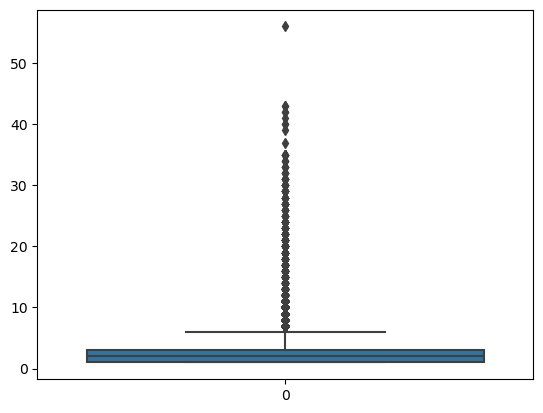

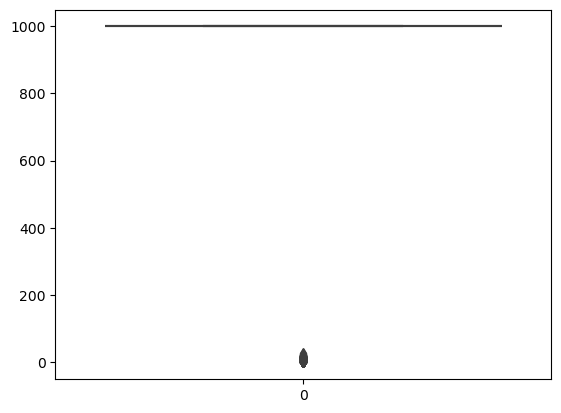

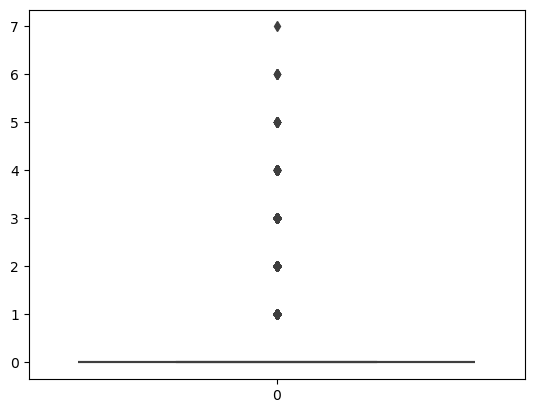

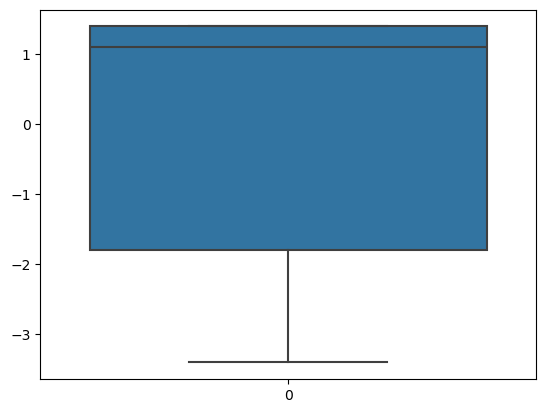

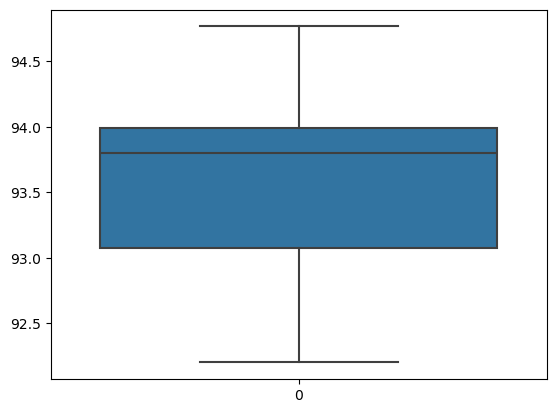

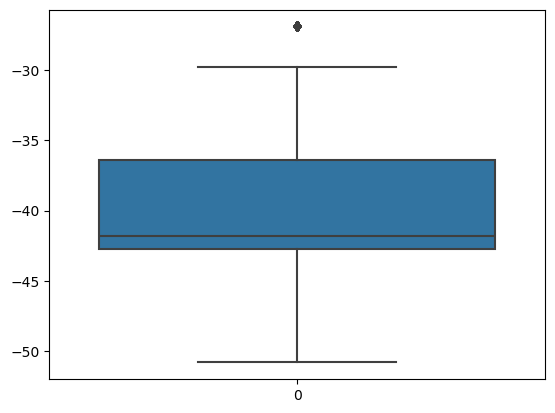

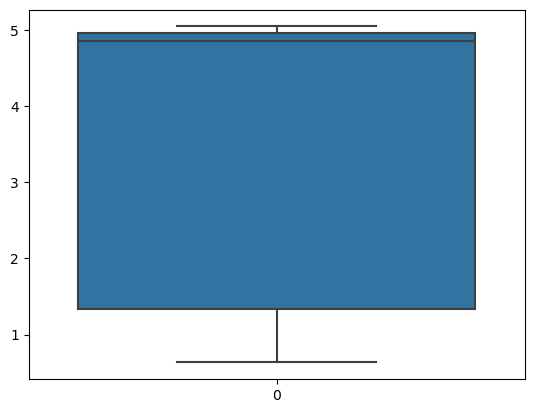

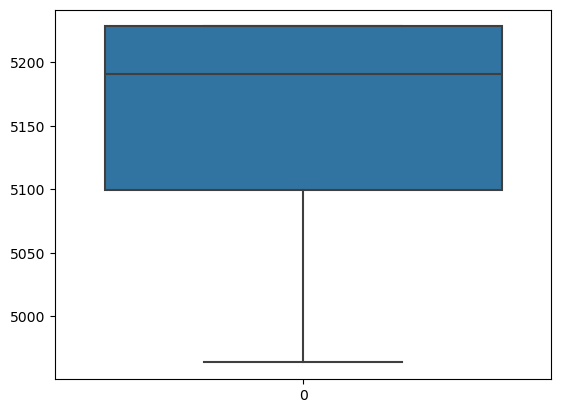

In [16]:
# remove the outlier using for loop
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        # plt.xlabel(i)
        plt.show()

In [17]:
for i in df.columns:
    if df[i].dtype != 'object':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        UR = Q3+(1.5*IQR)
        LR = Q1- (1.5*IQR)
        df[i] = df[i][(df[i]>=LR) & (df[i]<=UR)]

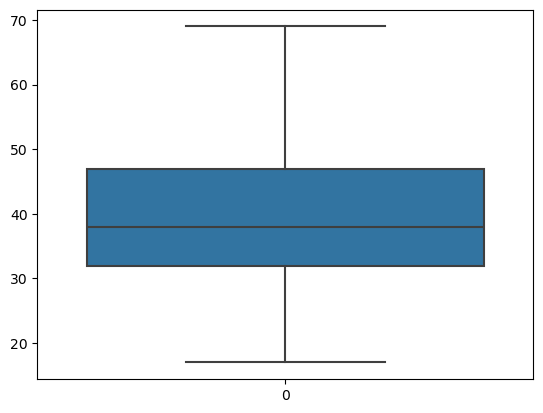

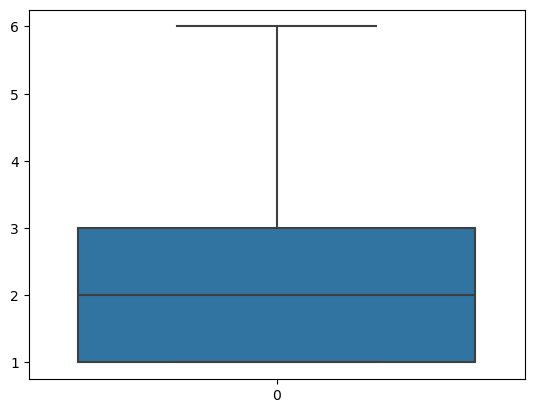

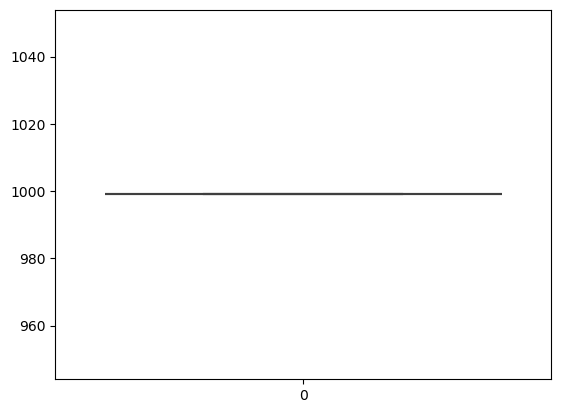

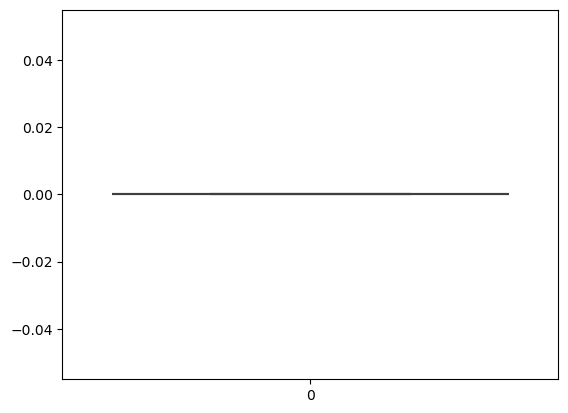

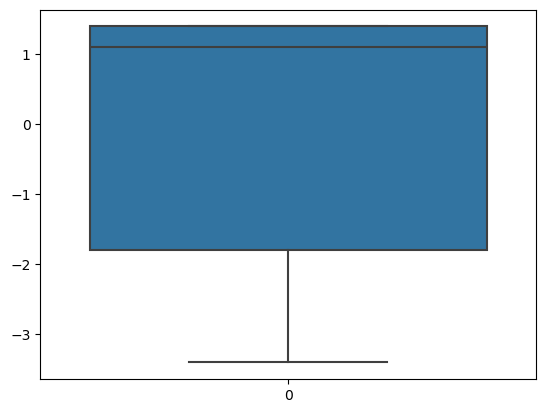

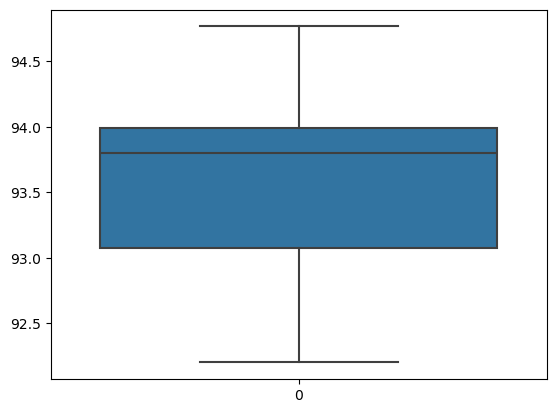

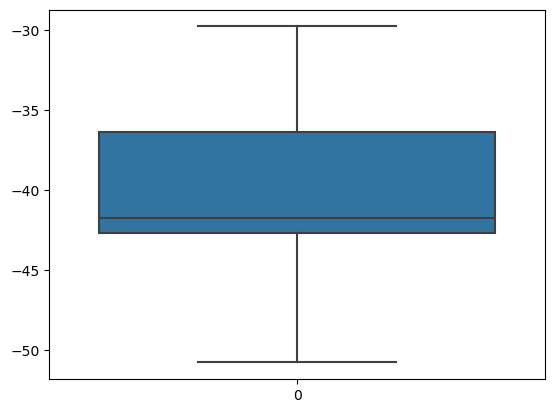

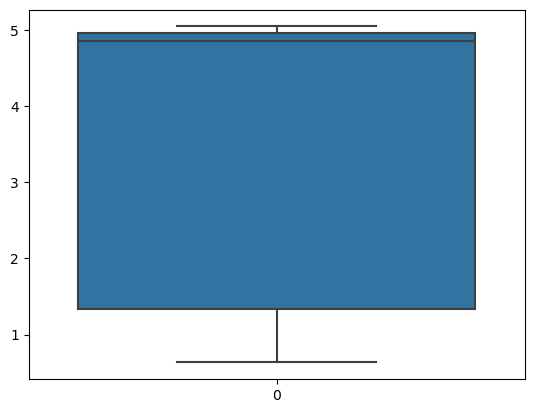

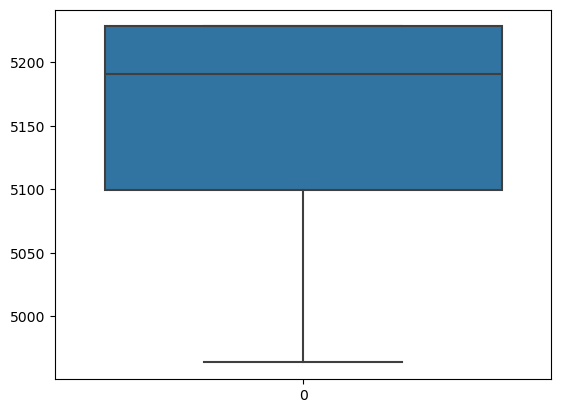

In [18]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        # plt.xlabel(i)
        plt.show()

In [19]:
df.shape

(39404, 20)

### Model Training

In [20]:
df.isna().sum()

age                458
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign          2398
pdays             1514
previous          5546
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx      436
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(31083, 20)

In [23]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [24]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed'],
      dtype='object')

In [25]:
cols=[]
for i in X.columns:
    if X[i].dtype == 'object':
        cols.append(i)
cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [26]:

le = LabelEncoder()

In [27]:
for i in X.columns:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])

X.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56.0,3,1,0,0,0,0,1,6,1,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0


In [28]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping


{'nonexistent': 0}

In [29]:
X.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, random_state = 85)

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

C:\Users\jadha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = model.predict(x_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [34]:
list(zip(y_test[:50],y_pred[:50]))

[('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('yes', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('yes', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no'),
 ('no', 'no')]

In [37]:
accuracy_score(y_test,y_pred)

0.9141064822261541

In [38]:
confusion_matrix(y_test,y_pred)

array([[5675,    8],
       [ 526,    8]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      1.00      0.96      5683
         yes       0.50      0.01      0.03       534

    accuracy                           0.91      6217
   macro avg       0.71      0.51      0.49      6217
weighted avg       0.88      0.91      0.88      6217



In [40]:
#Standardize
s = StandardScaler()
scaler_data = s.fit_transform(X)
scaler_data

array([[ 1.70878033, -0.19417584, -0.27028618, ...,  0.96880827,
         0.57584932,  0.16131552],
       [ 1.81394557,  0.9180124 , -0.27028618, ...,  0.96880827,
         0.57584932,  0.16131552],
       [-0.28935919,  0.9180124 , -0.27028618, ...,  0.96880827,
         0.57584932,  0.16131552],
       ...,
       [ 0.65712795, -0.75026995, -0.27028618, ..., -2.48574577,
        -1.87021192, -3.55196173],
       [ 1.70878033,  0.36191828, -0.27028618, ..., -2.48574577,
        -1.87021192, -3.55196173],
       [ 0.44679747,  1.47410652, -0.27028618, ..., -2.48574577,
        -1.87021192, -3.55196173]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(scaler_data,Y,train_size = 0.8, random_state = 85)

In [42]:
m = LogisticRegression()

In [43]:
m.fit(x_train, y_train)

LogisticRegression()

In [44]:
y= m.predict(x_test)

In [45]:
accuracy_score(y_test,y)

0.9150715779314782